<a href="https://colab.research.google.com/github/azmilzmhr/Wordfreq_wordcloud/blob/main/wordfreq_wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import modul pandas utk membaca dataframe dan nltk
import pandas as pd
#nltk untuk data cleansing
from nltk import *
from nltk.corpus import stopwords

#modul visualisasi wordcloud dlm bentuk image
from PIL import Image
#modul menghitung kemunculan kata
from collections import Counter
#modul membuat wordcloud
from wordcloud import WordCloud

#modul utk membuat grafik kata terbanyak
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#buka file
df = open('D:/data/my_struggle.txt', 'r', encoding="utf8").read()

In [ ]:
#data cleansing
clean = word_tokenize(df)
clean = [t.lower() for t in clean]
clean = [t for t in clean if t not in stopwords.words('english')]
clean = [t for t in clean if t.isalpha()]

lemmatizer = WordNetLemmatizer()
clean = [lemmatizer.lemmatize(t) for t in clean]

In [ ]:
#change list to string
def listToString(s):
    str1 = " "
    return (str1.join(s))

clear = listToString(clean)
type(clear)

In [ ]:
#wordcloud
clean_wc = WordCloud(
    background_color='white',
    max_words=20
)

clean_wc.generate(clear)

In [ ]:
#showing wordcloud
plt.imshow(clean_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#menghitung frekuensi kemunculan kata terbanyak dalam text
counted = Counter(clean)
wordfreq = pd.DataFrame(counted.items(), columns=['words','frequency']).sort_values(by='frequency', ascending=False)
wordfreq

,words,frequency
80,people,1130
250,would,1049
195,one,978
70,german,933
90,state,929
...,...,...
6988,descent,1
6985,provisional,1
6984,tendered,1
6983,brooding,1


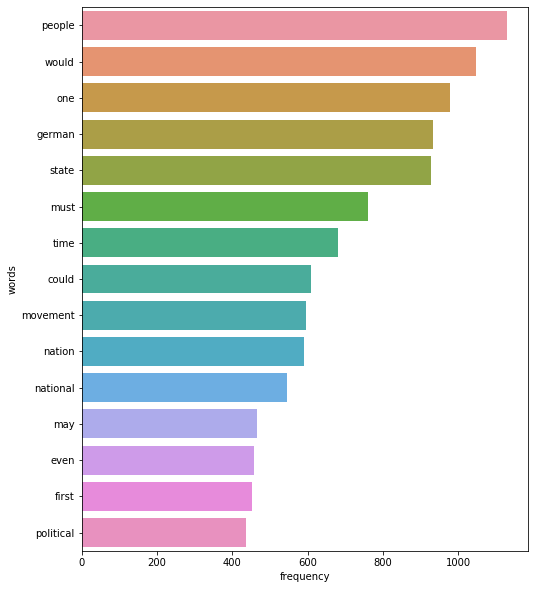

In [ ]:
#visualisasi grafik kemunculan kata terbanyak
fig, axes = plt.subplots(figsize=(8,10))
sns.barplot(x='frequency',y='words',data=wordfreq.head(15))